In [121]:


pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/mahaan/opt/anaconda3/lib/python3.7/site-packages (0.23.1)
Note: you may need to restart the kernel to use updated packages.


In [122]:
 pip show scikit-learn

Name: scikit-learn
Version: 0.23.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /Users/mahaan/opt/anaconda3/lib/python3.7/site-packages
Requires: scipy, numpy, threadpoolctl, joblib
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [123]:
import pandas as pd
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as plt

In [124]:
df=pd.read_excel('https://github.com/kalpitgupta369/Python/blob/master/Verzeo%20Major%20Project/Data_Train.xlsx?raw=true')

There are rows with NaN values which need to be handled and there are also rows with Power as 'null'. These have to be handled too

In [125]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [126]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

We plot some basic charts to have a visual idea about the data

Text(0.5, 1.0, 'Seats distribution')

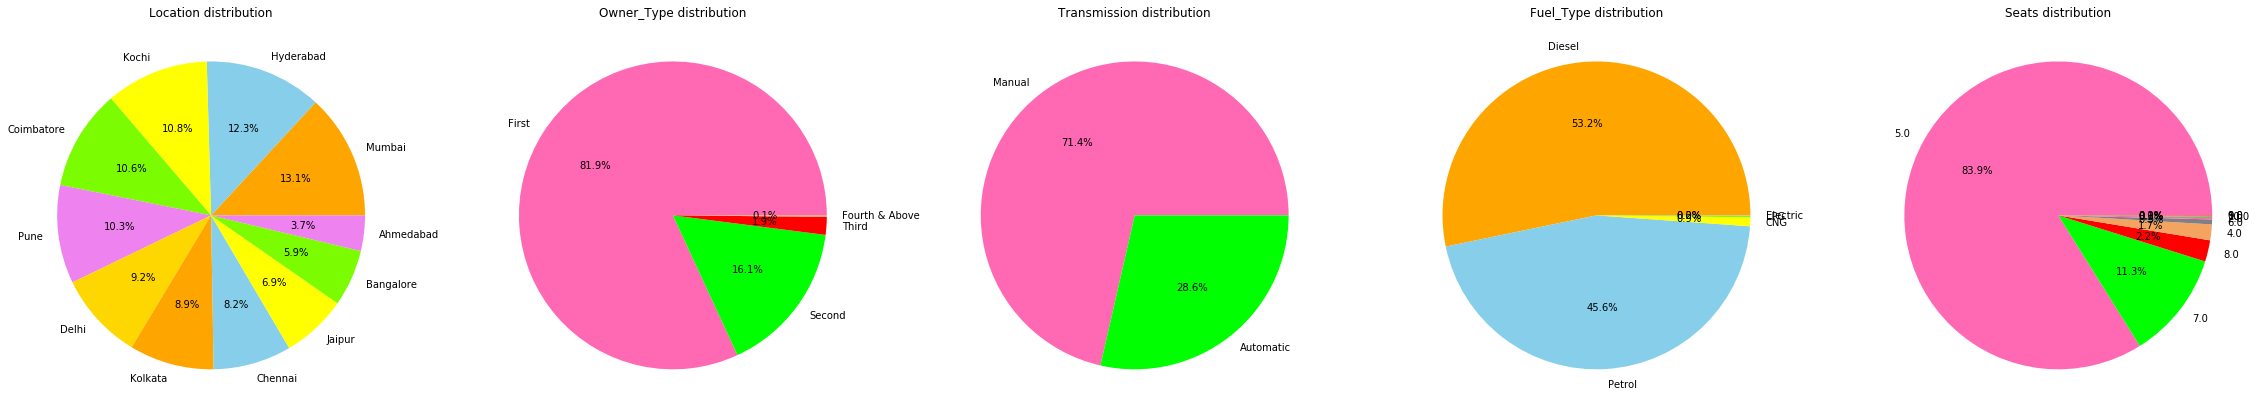

In [127]:
c1=['orange','skyblue','yellow','lawngreen','violet','gold',]
c2=['hotpink','lime','red','sandybrown','grey']

plt.figure(figsize=(40,10))
plt.subplot(1,5,1)
glab=df['Location'].value_counts().index
gval=df['Location'].value_counts().values
plt.pie(gval,labels=glab,colors=c1,autopct="%1.1f%%")
plt.title("Location distribution")
plt.subplot(1,5,2)
glab=df['Owner_Type'].value_counts().index
gval=df['Owner_Type'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Owner_Type distribution")
plt.subplot(1,5,3)
glab=df['Transmission'].value_counts().index
gval=df['Transmission'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Transmission distribution")
plt.subplot(1,5,4)
glab=df['Fuel_Type'].value_counts().index
gval=df['Fuel_Type'].value_counts().values
plt.pie(gval,labels=glab,colors=c1,autopct='%1.1f%%')
plt.title("Fuel_Type distribution")
plt.subplot(1,5,5)
glab=df['Seats'].value_counts().index
gval=df['Seats'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Seats distribution")

Text(0.5, 1.0, 'Price vs Fuel_type')

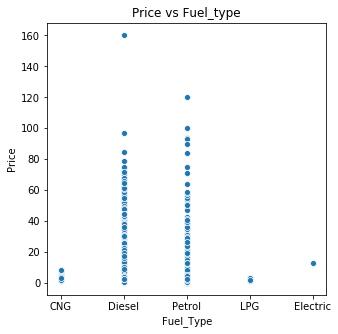

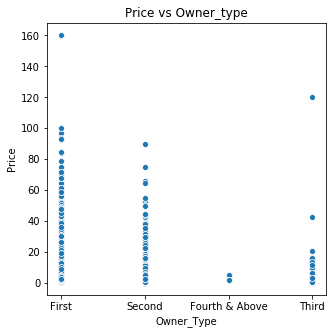

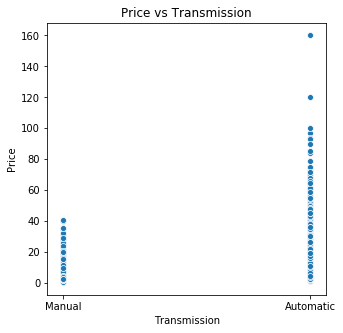

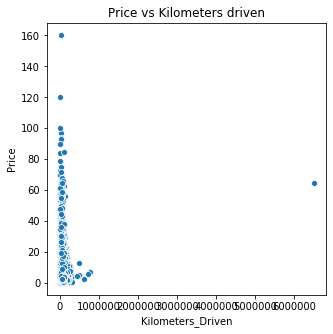

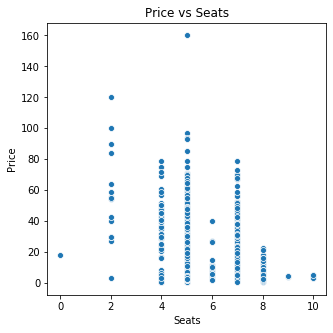

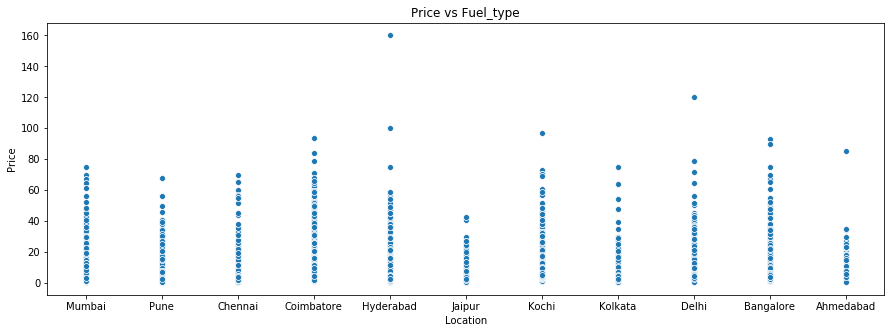

In [128]:
plt.figure(figsize=(5,5))

sb.scatterplot(y=df['Price'],x=df['Fuel_Type'])
plt.title("Price vs Fuel_type")

plt.figure(figsize=(5,5))
sb.scatterplot(y=df['Price'],x=df['Owner_Type'])
plt.title("Price vs Owner_type")

plt.figure(figsize=(5,5))
sb.scatterplot(y=df['Price'],x=df['Transmission'])
plt.title("Price vs Transmission")

plt.figure(figsize=(5,5))
sb.scatterplot(y=df['Price'],x=df['Kilometers_Driven'])
plt.title("Price vs Kilometers driven")

plt.figure(figsize=(5,5))
sb.scatterplot(y=df['Price'],x=df['Seats'])
plt.title("Price vs Seats")

plt.figure(figsize=(15,5))

sb.scatterplot(y=df['Price'],x=df['Location'])
plt.title("Price vs Fuel_type")

We now get to the task of converting string columns to either float or int type using a combination of string methods and then converting the data types

In [129]:
for junk in ['km/kg','kmpl']:
    df.Mileage = df.Mileage.str.replace(junk,' ')

In [130]:
df.Mileage=df.Mileage.astype(float)


In [131]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [132]:
df.Engine = df.Engine.str.replace('CC',' ')
df.Power = df.Power.str.replace('bhp',' ')
df.Power = df.Power.str.replace('null','nan')

df.Engine=df.Engine.astype(float)
df.Power=df.Power.astype(float)

In [133]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [134]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [135]:
df[df.Fuel_Type=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


In [136]:
df['Mileage_per_kg']=[0.0 for i in range(len(df.Mileage))]
df['Mileage_per_l']=[0.0 for i in range(len(df.Mileage))]

In [137]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_per_kg,Mileage_per_l
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,0.0,0.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,0.0,0.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,0.0,0.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,0.0,0.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,0.0,0.0
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,0.0,0.0
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,0.0,0.0
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,0.0,0.0


We now make two separate columns for mileage depending on what kind of fuel the car runs on, liquid or gas



In [138]:
for i in range(len(df)):
    if (df['Fuel_Type'][i]=='CNG'):
        df['Mileage_per_kg'][i]=df['Mileage'][i]
    if (df['Fuel_Type'][i]=='LPG'):
        df['Mileage_per_kg'][i]=df['Mileage'][i]
    if (df['Fuel_Type'][i]=='Petrol'):
        df['Mileage_per_l'][i]=df['Mileage'][i]
    if (df['Fuel_Type'][i]=='Diesel'):
        df['Mileage_per_l'][i]=df['Mileage'][i]
    if (df['Fuel_Type'][i]=='Electric'):
        df['Mileage_per_l'][i]=0
        df['Mileage_per_kg'][i]=0
        
        

/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [139]:
df.Transmission = df.Transmission.str.replace('Manual','1')
df.Transmission = df.Transmission.str.replace('Automatic','2')
df['Transmission'] = df['Transmission'].astype(float)
df.Owner_Type = df.Owner_Type.str.replace('First','1')
df.Owner_Type = df.Owner_Type.str.replace('Second','2')
df.Owner_Type = df.Owner_Type.str.replace("Third",'3')
df.Owner_Type = df.Owner_Type.str.replace('Fourth & Above','4') 
df['Owner_Type'] = df['Owner_Type'].astype(float)
df.Fuel_Type = df.Fuel_Type.str.replace('Petrol','1')
df.Fuel_Type = df.Fuel_Type.str.replace('Diesel','2')
df.Fuel_Type = df.Fuel_Type.str.replace('CNG','3')
df.Fuel_Type = df.Fuel_Type.str.replace('LPG','4')
df.Fuel_Type = df.Fuel_Type.str.replace('Electric','5') 
df['Fuel_Type'] = df['Fuel_Type'].astype(float)    


We now convert categorical string values and make them float types using simple string methods as it'll let us visualise a correlation matrix so we can weed out extra variables on the basis of multicollinearity.

We don't use any complicated encoding because there's a clear relation between the string and number for Owner_Type, Transmission and Fuel_Type columns. (ex --> 'First' can obviously be 1 and so on, similarly same petrol types are grouped together because normally the same model of car running on petrol/diesel is generally cheaper than the same model running on CNG/LPG)

In [140]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_per_kg,Mileage_per_l
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,3.0,1.0,1.0,26.60,998.0,58.16,5.0,1.75,26.6,0.00
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,2.0,1.0,1.0,19.67,1582.0,126.20,5.0,12.50,0.0,19.67
2,Honda Jazz V,Chennai,2011,46000,1.0,1.0,1.0,18.20,1199.0,88.70,5.0,4.50,0.0,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,2.0,1.0,1.0,20.77,1248.0,88.76,7.0,6.00,0.0,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2.0,2.0,2.0,15.20,1968.0,140.80,5.0,17.74,0.0,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,2.0,1.0,1.0,28.40,1248.0,74.00,5.0,4.75,0.0,28.40
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,2.0,1.0,1.0,24.40,1120.0,71.00,5.0,4.00,0.0,24.40
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,2.0,1.0,2.0,14.00,2498.0,112.00,8.0,2.90,0.0,14.00
6017,Maruti Wagon R VXI,Kolkata,2013,46000,1.0,1.0,1.0,18.90,998.0,67.10,5.0,2.65,0.0,18.90


now we can safely drop the original mileage column

In [141]:
df=df.drop(['Mileage'],axis=1)

In [142]:
df_temp1=df

Let us go ahead and drop any rows which contain even a single nan value

In [143]:
df_drop_na=df_temp1.dropna()

In [144]:
df_drop_na

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_per_kg,Mileage_per_l
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,3.0,1.0,1.0,998.0,58.16,5.0,1.75,26.6,0.00
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,2.0,1.0,1.0,1582.0,126.20,5.0,12.50,0.0,19.67
2,Honda Jazz V,Chennai,2011,46000,1.0,1.0,1.0,1199.0,88.70,5.0,4.50,0.0,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,2.0,1.0,1.0,1248.0,88.76,7.0,6.00,0.0,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2.0,2.0,2.0,1968.0,140.80,5.0,17.74,0.0,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,2.0,1.0,1.0,1248.0,74.00,5.0,4.75,0.0,28.40
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,2.0,1.0,1.0,1120.0,71.00,5.0,4.00,0.0,24.40
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,2.0,1.0,2.0,2498.0,112.00,8.0,2.90,0.0,14.00
6017,Maruti Wagon R VXI,Kolkata,2013,46000,1.0,1.0,1.0,998.0,67.10,5.0,2.65,0.0,18.90


In [145]:
df_int=df_drop_na

In [146]:
print(df_int.shape)
print(df_int.max())

(5874, 13)
Name                 Volvo XC90 2007-2015 D5 AWD
Location                                    Pune
Year                                        2019
Kilometers_Driven                        6500000
Fuel_Type                                      5
Transmission                                   2
Owner_Type                                     4
Engine                                      5998
Power                                        560
Seats                                         10
Price                                        160
Mileage_per_kg                             33.54
Mileage_per_l                               28.4
dtype: object


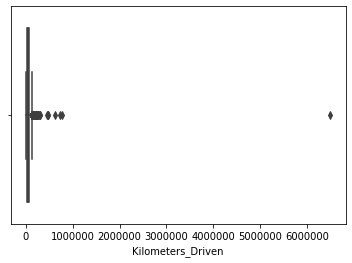

In [147]:
sb.boxplot(df_int['Kilometers_Driven'])

There's a noticeable outlier here. To handle this, we use z-scores as a tool for removing outliers which centres the feature frequency around zero and then superimposes a standard normal distribution on the feature and removes data lying outside a particular threshold.

In [148]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_int.Kilometers_Driven))
df_int.Kilometers_Driven = df_int.Kilometers_Driven[(z < 3)]

/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


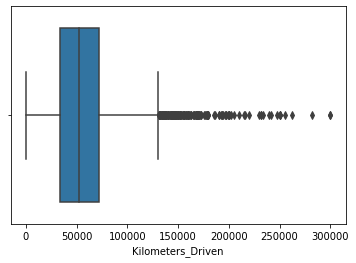

In [149]:
sb.boxplot(df_int['Kilometers_Driven'])

We see our problem is solved now. the huge outliers in the kilometers driven are not a problem anymore

In [150]:
df_int.max()

Name                 Volvo XC90 2007-2015 D5 AWD
Location                                    Pune
Year                                        2019
Kilometers_Driven                         300000
Fuel_Type                                      5
Transmission                                   2
Owner_Type                                     4
Engine                                      5998
Power                                        560
Seats                                         10
Price                                        160
Mileage_per_kg                             33.54
Mileage_per_l                               28.4
dtype: object

In [151]:
df_int[df_int.Kilometers_Driven==300000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_per_kg,Mileage_per_l
3649,Tata Indigo LS,Jaipur,2008,300000.0,2.0,1.0,1.0,1405.0,70.0,5.0,1.0,0.0,17.0


In [152]:
df_int_train=df_int.dropna()

In [153]:
df_int_train.shape

(5867, 13)

We see that 7 rows were dropped 

In [154]:
#df_int_train[['Brand','Model']] = df_int.Name.str.split(n=1,expand=True)
#test[['Brand','Model']] = test.Name.str.split(n=1,expand=True)

We filtered out all values having a z-score > 3 , what this does is it replaces the value with NaN which we then drop out by using dropna()

In [155]:
df_int_train.to_csv('df_int_train.csv')

In [156]:
df_int_train.corr()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_per_kg,Mileage_per_l
Year,1.000000,-0.499057,0.102713,0.084939,-0.386130,-0.069086,0.013746,0.007847,0.299085,0.007839,0.262151
Kilometers_Driven,-0.499057,1.000000,0.245522,-0.120240,0.242721,0.182289,0.004761,0.245782,-0.179695,-0.002567,-0.140225
Fuel_Type,0.102713,0.245522,1.000000,0.105495,-0.040443,0.361621,0.231690,0.277185,0.278190,0.302923,-0.037019
Transmission,0.084939,-0.120240,0.105495,1.000000,-0.002388,0.500402,0.643571,-0.074644,0.585693,-0.065596,-0.308224
Owner_Type,-0.386130,0.242721,-0.040443,-0.002388,1.000000,0.059011,0.026350,0.011394,-0.091103,-0.005625,-0.134921
Engine,-0.069086,0.182289,0.361621,0.500402,0.059011,1.000000,0.866034,0.401383,0.657275,-0.098160,-0.536674
Power,0.013746,0.004761,0.231690,0.643571,0.026350,0.866034,1.000000,0.101785,0.772414,-0.097538,-0.445621
Seats,0.007847,0.245782,0.277185,-0.074644,0.011394,0.401383,0.101785,1.000000,0.055828,-0.039996,-0.285981
Price,0.299085,-0.179695,0.278190,0.585693,-0.091103,0.657275,0.772414,0.055828,1.000000,-0.057350,-0.286568
Mileage_per_kg,0.007839,-0.002567,0.302923,-0.065596,-0.005625,-0.098160,-0.097538,-0.039996,-0.057350,1.000000,-0.394449


In [157]:
df_int_features=df_int_train.drop('Price',axis=1)

In [158]:
df_int_features.corr()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Mileage_per_kg,Mileage_per_l
Year,1.000000,-0.499057,0.102713,0.084939,-0.386130,-0.069086,0.013746,0.007847,0.007839,0.262151
Kilometers_Driven,-0.499057,1.000000,0.245522,-0.120240,0.242721,0.182289,0.004761,0.245782,-0.002567,-0.140225
Fuel_Type,0.102713,0.245522,1.000000,0.105495,-0.040443,0.361621,0.231690,0.277185,0.302923,-0.037019
Transmission,0.084939,-0.120240,0.105495,1.000000,-0.002388,0.500402,0.643571,-0.074644,-0.065596,-0.308224
Owner_Type,-0.386130,0.242721,-0.040443,-0.002388,1.000000,0.059011,0.026350,0.011394,-0.005625,-0.134921
Engine,-0.069086,0.182289,0.361621,0.500402,0.059011,1.000000,0.866034,0.401383,-0.098160,-0.536674
Power,0.013746,0.004761,0.231690,0.643571,0.026350,0.866034,1.000000,0.101785,-0.097538,-0.445621
Seats,0.007847,0.245782,0.277185,-0.074644,0.011394,0.401383,0.101785,1.000000,-0.039996,-0.285981
Mileage_per_kg,0.007839,-0.002567,0.302923,-0.065596,-0.005625,-0.098160,-0.097538,-0.039996,1.000000,-0.394449
Mileage_per_l,0.262151,-0.140225,-0.037019,-0.308224,-0.134921,-0.536674,-0.445621,-0.285981,-0.394449,1.000000


Checking correlation between features is a method of feature selection in linear regression as we can choose one among a pair of highly correlated features when we build our model. This is the principle of multicollinearity that we are using to help us in feature selection. As we can see here, engine and power are highly correlated so we can pick one and discard the other when we build the linear regression model. Below we do the same thing, except this time we use a heatmap

In [159]:
df_int_train.shape

(5867, 13)

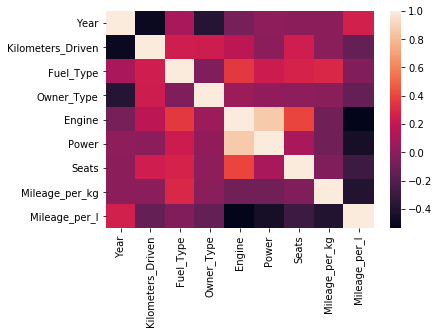

In [160]:
for_model=df_int_train[['Location','Year','Kilometers_Driven','Fuel_Type','Owner_Type','Engine','Power','Seats','Mileage_per_kg','Mileage_per_l']]
sb.heatmap(for_model.corr())


In [161]:
df_int_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_per_kg,Mileage_per_l
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,3.0,1.0,1.0,998.0,58.16,5.0,1.75,26.6,0.00
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,2.0,1.0,1.0,1582.0,126.20,5.0,12.50,0.0,19.67
2,Honda Jazz V,Chennai,2011,46000.0,1.0,1.0,1.0,1199.0,88.70,5.0,4.50,0.0,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000.0,2.0,1.0,1.0,1248.0,88.76,7.0,6.00,0.0,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,2.0,2.0,2.0,1968.0,140.80,5.0,17.74,0.0,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365.0,2.0,1.0,1.0,1248.0,74.00,5.0,4.75,0.0,28.40
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,2.0,1.0,1.0,1120.0,71.00,5.0,4.00,0.0,24.40
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,2.0,1.0,2.0,2498.0,112.00,8.0,2.90,0.0,14.00
6017,Maruti Wagon R VXI,Kolkata,2013,46000.0,1.0,1.0,1.0,998.0,67.10,5.0,2.65,0.0,18.90


In [163]:
df=pd.read_excel('https://github.com/kalpitgupta369/Python/blob/master/Verzeo%20Major%20Project/Data_Test.xlsx?raw=true')
for junk1 in ['km/kg','kmpl']:
    df.Mileage = df.Mileage.str.replace(junk1,' ')
df.Mileage=df.Mileage.astype(float)

df.Engine = df.Engine.str.replace('CC',' ')
df.Power = df.Power.str.replace('bhp',' ')
df.Power = df.Power.str.replace('null','nan')

df.Engine=df.Engine.astype(float)
df.Power=df.Power.astype(float)

df['Mileage_per_kg']=[0.0 for i in range(len(df.Mileage))]
df['Mileage_per_l']=[0.0 for i in range(len(df.Mileage))]

for i in range(len(df)):
    if (df['Fuel_Type'][i]=='CNG'):
        df['Mileage_per_kg'][i]=df['Mileage'][i]
    if (df['Fuel_Type'][i]=='LPG'):
        df['Mileage_per_kg'][i]=df['Mileage'][i]
    if (df['Fuel_Type'][i]=='Petrol'):
        df['Mileage_per_l'][i]=df['Mileage'][i]
    if (df['Fuel_Type'][i]=='Diesel'):
        df['Mileage_per_l'][i]=df['Mileage'][i]
    if (df['Fuel_Type'][i]=='Electric'):
        df['Mileage_per_l'][i]=0
        df['Mileage_per_kg'][i]=0
        
df.Transmission = df.Transmission.str.replace('Manual','1')
df.Transmission = df.Transmission.str.replace('Automatic','2')
df['Transmission'] = df['Transmission'].astype(float)
df.Owner_Type = df.Owner_Type.str.replace('First','1')
df.Owner_Type = df.Owner_Type.str.replace('Second','2')
df.Owner_Type = df.Owner_Type.str.replace("Third",'3')
df.Owner_Type = df.Owner_Type.str.replace('Fourth & Above','4') 
df['Owner_Type'] = df['Owner_Type'].astype(float)
df.Fuel_Type = df.Fuel_Type.str.replace('Petrol','1')
df.Fuel_Type = df.Fuel_Type.str.replace('Diesel','2')
df.Fuel_Type = df.Fuel_Type.str.replace('CNG','3')
df.Fuel_Type = df.Fuel_Type.str.replace('LPG','4')
df.Fuel_Type = df.Fuel_Type.str.replace('Electric','5') 
df['Fuel_Type'] = df['Fuel_Type'].astype(float)   

df=df.drop(['Mileage'],axis=1)

df_temp1=df

df_drop_na=df_temp1.dropna()

df_int_test=df_drop_na

#df_int_test[['Brand','Model']] = test.Name.str.split(n=1,expand=True)

print(df_int_test.shape)

df_int_test

/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipyke

(1201, 12)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Mileage_per_kg,Mileage_per_l
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,3.0,1.0,1.0,998.0,58.20,4.0,32.26,0.00
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,1.0,1.0,2.0,796.0,47.30,5.0,0.00,24.70
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,2.0,1.0,1.0,2393.0,147.80,7.0,0.00,13.68
4,Hyundai i20 Magna,Mumbai,2014,29000,1.0,1.0,1.0,1197.0,82.85,5.0,0.00,18.50
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,2.0,1.0,2.0,2179.0,140.00,7.0,0.00,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,2.0,1.0,1.0,1598.0,103.60,5.0,0.00,20.54
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,1.0,2.0,1.0,1197.0,103.60,5.0,0.00,17.21
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,2.0,1.0,1.0,1461.0,63.10,5.0,0.00,23.08
1232,Volkswagen Polo GT TSI,Pune,2013,52262,1.0,2.0,3.0,1197.0,103.60,5.0,0.00,17.20


We do the same thing all at once for the test data, except removing the outliers

In [164]:
location=np.array(df_int_train.Location)

In [165]:
location

array(['Mumbai', 'Pune', 'Chennai', ..., 'Jaipur', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [166]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Converting the location values to numerical values through label encoding and then finally to one hot encoding because they are string values which are categorical

In [167]:
lblenc=LabelEncoder().fit_transform(location)

In [168]:
lblenc

array([ 9, 10,  2, ...,  6,  8,  5])

In [169]:
dic={}
for i in range(len(location)):
    dic[str(location[i])]=lblenc[i]

In [170]:
dic

{'Mumbai': 9,
 'Pune': 10,
 'Chennai': 2,
 'Coimbatore': 3,
 'Hyderabad': 5,
 'Jaipur': 6,
 'Kochi': 7,
 'Kolkata': 8,
 'Delhi': 4,
 'Bangalore': 1,
 'Ahmedabad': 0}

In [171]:
lblenc=lblenc.reshape(-1,1)
ohenc=OneHotEncoder(sparse=False).fit_transform(lblenc)

In [172]:
ohenc.shape

(5867, 11)

In [173]:
location_test=np.array(df_int_test.Location)
lblenc_test=LabelEncoder().fit_transform(location_test)
dic_test={}
for i in range(len(location_test)):
    dic_test[str(location_test[i])]=lblenc_test[i]
lblenc_test=lblenc_test.reshape(-1,1)
ohenc_test=OneHotEncoder(sparse=False).fit_transform(lblenc_test)    

In [174]:
dic_test

{'Delhi': 4,
 'Coimbatore': 3,
 'Mumbai': 9,
 'Pune': 10,
 'Jaipur': 6,
 'Chennai': 2,
 'Hyderabad': 5,
 'Kochi': 7,
 'Bangalore': 1,
 'Kolkata': 8,
 'Ahmedabad': 0}

We now use one hot encoding (alongwith label encoder) to convert locations to categorical variables

In [175]:
dic


{'Mumbai': 9,
 'Pune': 10,
 'Chennai': 2,
 'Coimbatore': 3,
 'Hyderabad': 5,
 'Jaipur': 6,
 'Kochi': 7,
 'Kolkata': 8,
 'Delhi': 4,
 'Bangalore': 1,
 'Ahmedabad': 0}

In [176]:
df_int_train['location_Ahmedabad']=ohenc[:,0]
df_int_train['location_Bangalore']=ohenc[:,1]
df_int_train['location_Chennai']=ohenc[:,2]
df_int_train['location_Coimbatore']=ohenc[:,3]
df_int_train['location_Delhi']=ohenc[:,4]
df_int_train['location_Hyderabad']=ohenc[:,5]
df_int_train['location_Jaipur']=ohenc[:,6]
df_int_train['location_Kochi']=ohenc[:,7]
df_int_train['location_Kolkata']=ohenc[:,8]
df_int_train['location_Mumbai']=ohenc[:,9]
df_int_train['location_Pune']=ohenc[:,10]
df_int_train=df_int_train.drop(['Location'],axis=1)

/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [177]:
df_int_train

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,...,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune
0,Maruti Wagon R LXI CNG,2010,72000.0,3.0,1.0,1.0,998.0,58.16,5.0,1.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000.0,2.0,1.0,1.0,1582.0,126.20,5.0,12.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Honda Jazz V,2011,46000.0,1.0,1.0,1.0,1199.0,88.70,5.0,4.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Maruti Ertiga VDI,2012,87000.0,2.0,1.0,1.0,1248.0,88.76,7.0,6.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670.0,2.0,2.0,2.0,1968.0,140.80,5.0,17.74,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365.0,2.0,1.0,1.0,1248.0,74.00,5.0,4.75,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6015,Hyundai Xcent 1.1 CRDi S,2015,100000.0,2.0,1.0,1.0,1120.0,71.00,5.0,4.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6016,Mahindra Xylo D4 BSIV,2012,55000.0,2.0,1.0,2.0,2498.0,112.00,8.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6017,Maruti Wagon R VXI,2013,46000.0,1.0,1.0,1.0,998.0,67.10,5.0,2.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [178]:
df_int_train.dtypes

Name                    object
Year                     int64
Kilometers_Driven      float64
Fuel_Type              float64
Transmission           float64
Owner_Type             float64
Engine                 float64
Power                  float64
Seats                  float64
Price                  float64
Mileage_per_kg         float64
Mileage_per_l          float64
location_Ahmedabad     float64
location_Bangalore     float64
location_Chennai       float64
location_Coimbatore    float64
location_Delhi         float64
location_Hyderabad     float64
location_Jaipur        float64
location_Kochi         float64
location_Kolkata       float64
location_Mumbai        float64
location_Pune          float64
dtype: object

In [179]:
df_int_test['location_Ahmedabad']=ohenc_test[:,0]
df_int_test['location_Bangalore']=ohenc_test[:,1]
df_int_test['location_Chennai']=ohenc_test[:,2]
df_int_test['location_Coimbatore']=ohenc_test[:,3]
df_int_test['location_Delhi']=ohenc_test[:,4]
df_int_test['location_Hyderabad']=ohenc_test[:,5]
df_int_test['location_Jaipur']=ohenc_test[:,6]
df_int_test['location_Kochi']=ohenc_test[:,7]
df_int_test['location_Kolkata']=ohenc_test[:,8]
df_int_test['location_Mumbai']=ohenc_test[:,9]
df_int_test['location_Pune']=ohenc_test[:,10]
df_int_test=df_int_test.drop(['Location'],axis=1)

/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mahaan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

We now use the same thing for test data

In [180]:
df_int_test

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Mileage_per_kg,...,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune
0,Maruti Alto K10 LXI CNG,2014,40929,3.0,1.0,1.0,998.0,58.20,4.0,32.26,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Maruti Alto 800 2016-2019 LXI,2013,54493,1.0,1.0,2.0,796.0,47.30,5.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,2017,34000,2.0,1.0,1.0,2393.0,147.80,7.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Hyundai i20 Magna,2014,29000,1.0,1.0,1.0,1197.0,82.85,5.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Mahindra XUV500 W8 2WD,2016,85609,2.0,1.0,2.0,2179.0,140.00,7.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,2011,89411,2.0,1.0,1.0,1598.0,103.60,5.0,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1230,Volkswagen Polo GT TSI,2015,59000,1.0,2.0,1.0,1197.0,103.60,5.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1231,Nissan Micra Diesel XV,2012,28000,2.0,1.0,1.0,1461.0,63.10,5.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1232,Volkswagen Polo GT TSI,2013,52262,1.0,2.0,3.0,1197.0,103.60,5.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [181]:
df_int_train.dtypes

Name                    object
Year                     int64
Kilometers_Driven      float64
Fuel_Type              float64
Transmission           float64
Owner_Type             float64
Engine                 float64
Power                  float64
Seats                  float64
Price                  float64
Mileage_per_kg         float64
Mileage_per_l          float64
location_Ahmedabad     float64
location_Bangalore     float64
location_Chennai       float64
location_Coimbatore    float64
location_Delhi         float64
location_Hyderabad     float64
location_Jaipur        float64
location_Kochi         float64
location_Kolkata       float64
location_Mumbai        float64
location_Pune          float64
dtype: object

In [182]:
df_int_train.corr()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_per_kg,...,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune
Year,1.000000,-0.499057,0.102713,0.084939,-0.386130,-0.069086,0.013746,0.007847,0.299085,0.007839,...,-0.046234,-0.129742,0.215602,-0.010071,-0.079026,-0.069278,0.229999,-0.033543,-0.009475,-0.106704
Kilometers_Driven,-0.499057,1.000000,0.245522,-0.120240,0.242721,0.182289,0.004761,0.245782,-0.179695,-0.002567,...,0.002833,0.148882,-0.100985,0.004813,0.155911,0.112419,-0.125473,-0.143357,-0.141654,0.128772
Fuel_Type,0.102713,0.245522,1.000000,0.105495,-0.040443,0.361621,0.231690,0.277185,0.278190,0.302923,...,0.025497,0.028759,-0.000379,0.016474,0.115778,0.009144,-0.044701,-0.046079,-0.084684,-0.030689
Transmission,0.084939,-0.120240,0.105495,1.000000,-0.002388,0.500402,0.643571,-0.074644,0.585693,-0.065596,...,0.069662,-0.026403,0.078482,0.014222,-0.018532,-0.095983,0.020412,-0.095873,0.079856,-0.037629
Owner_Type,-0.386130,0.242721,-0.040443,-0.002388,1.000000,0.059011,0.026350,0.011394,-0.091103,-0.005625,...,0.110781,0.128348,-0.068024,-0.011374,-0.070530,0.061015,-0.108970,-0.096284,-0.011099,0.128916
Engine,-0.069086,0.182289,0.361621,0.500402,0.059011,1.000000,0.866034,0.401383,0.657275,-0.098160,...,0.084279,0.002294,0.056091,0.045983,0.007349,-0.075613,-0.024371,-0.074618,0.026171,-0.040398
Power,0.013746,0.004761,0.231690,0.643571,0.026350,0.866034,1.000000,0.101785,0.772414,-0.097538,...,0.090616,-0.029141,0.078900,0.040819,-0.028096,-0.098251,0.010007,-0.067025,0.058944,-0.057842
Seats,0.007847,0.245782,0.277185,-0.074644,0.011394,0.401383,0.101785,1.000000,0.055828,-0.039996,...,0.016845,0.013750,0.009159,0.035903,0.023324,-0.011857,-0.031229,-0.044255,-0.005219,-0.003980
Price,0.299085,-0.179695,0.278190,0.585693,-0.091103,0.657275,0.772414,0.055828,1.000000,-0.057350,...,0.090640,-0.046399,0.171010,0.005134,0.010375,-0.088556,0.051262,-0.107110,-0.005492,-0.080530
Mileage_per_kg,0.007839,-0.002567,0.302923,-0.065596,-0.005625,-0.098160,-0.097538,-0.039996,-0.057350,1.000000,...,-0.025699,-0.018712,-0.035574,0.026132,-0.002253,-0.016314,0.003191,-0.031980,0.042122,0.041153


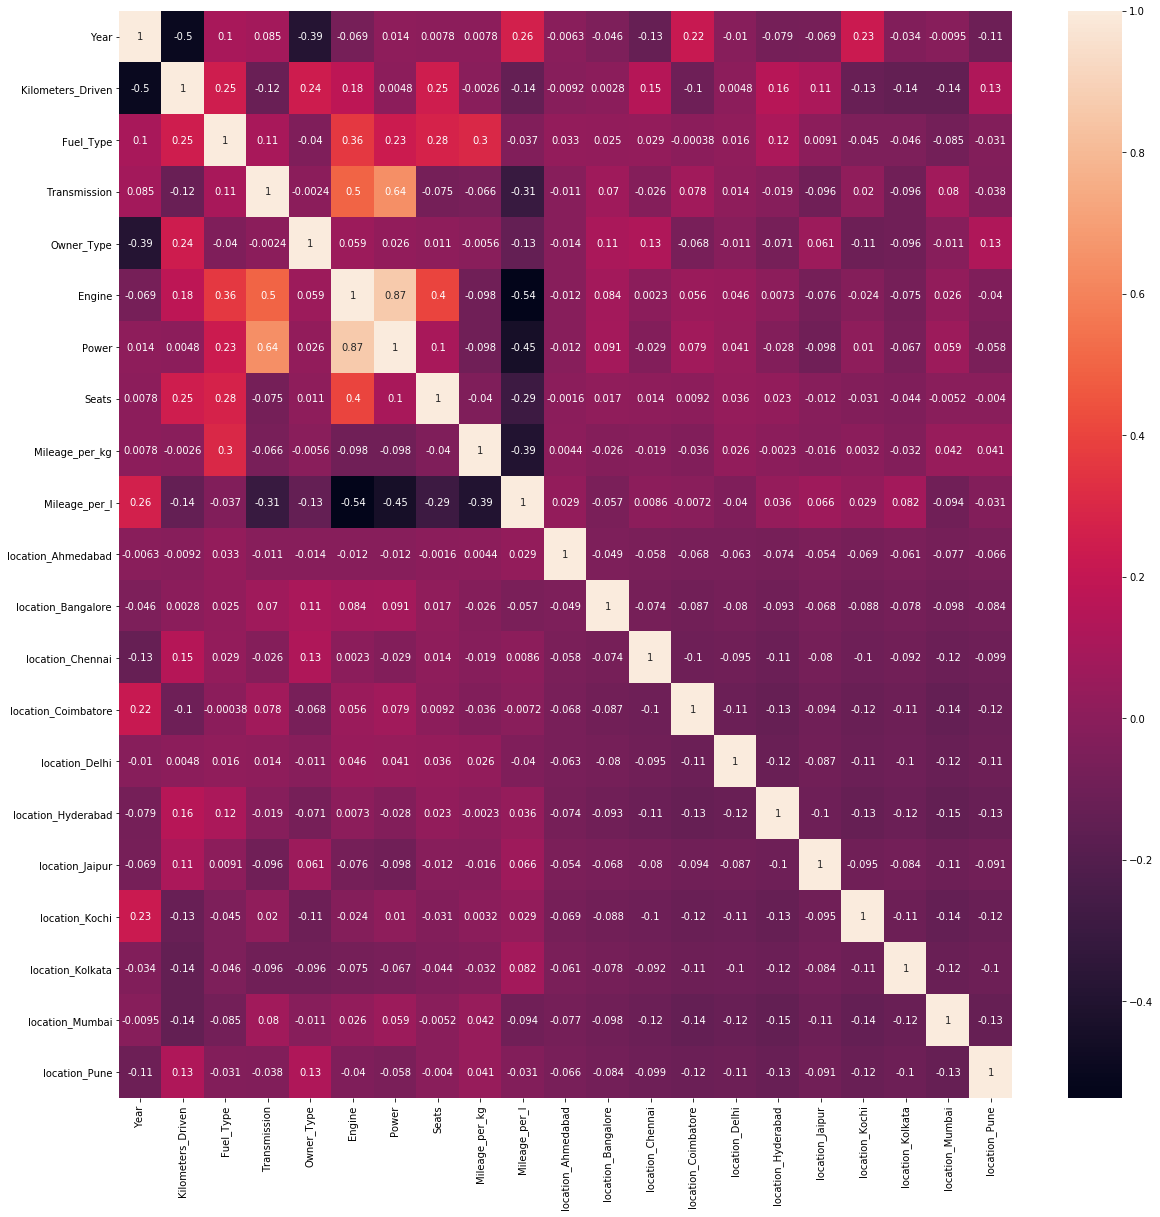

In [183]:
import matplotlib.pyplot as plt
df_int_features=df_int_train.drop('Price',axis=1)
plt.figure(figsize=(20,20))
sb.heatmap(df_int_features.corr(),annot=True)

We finally have the entire correlation heatmap for all the variables

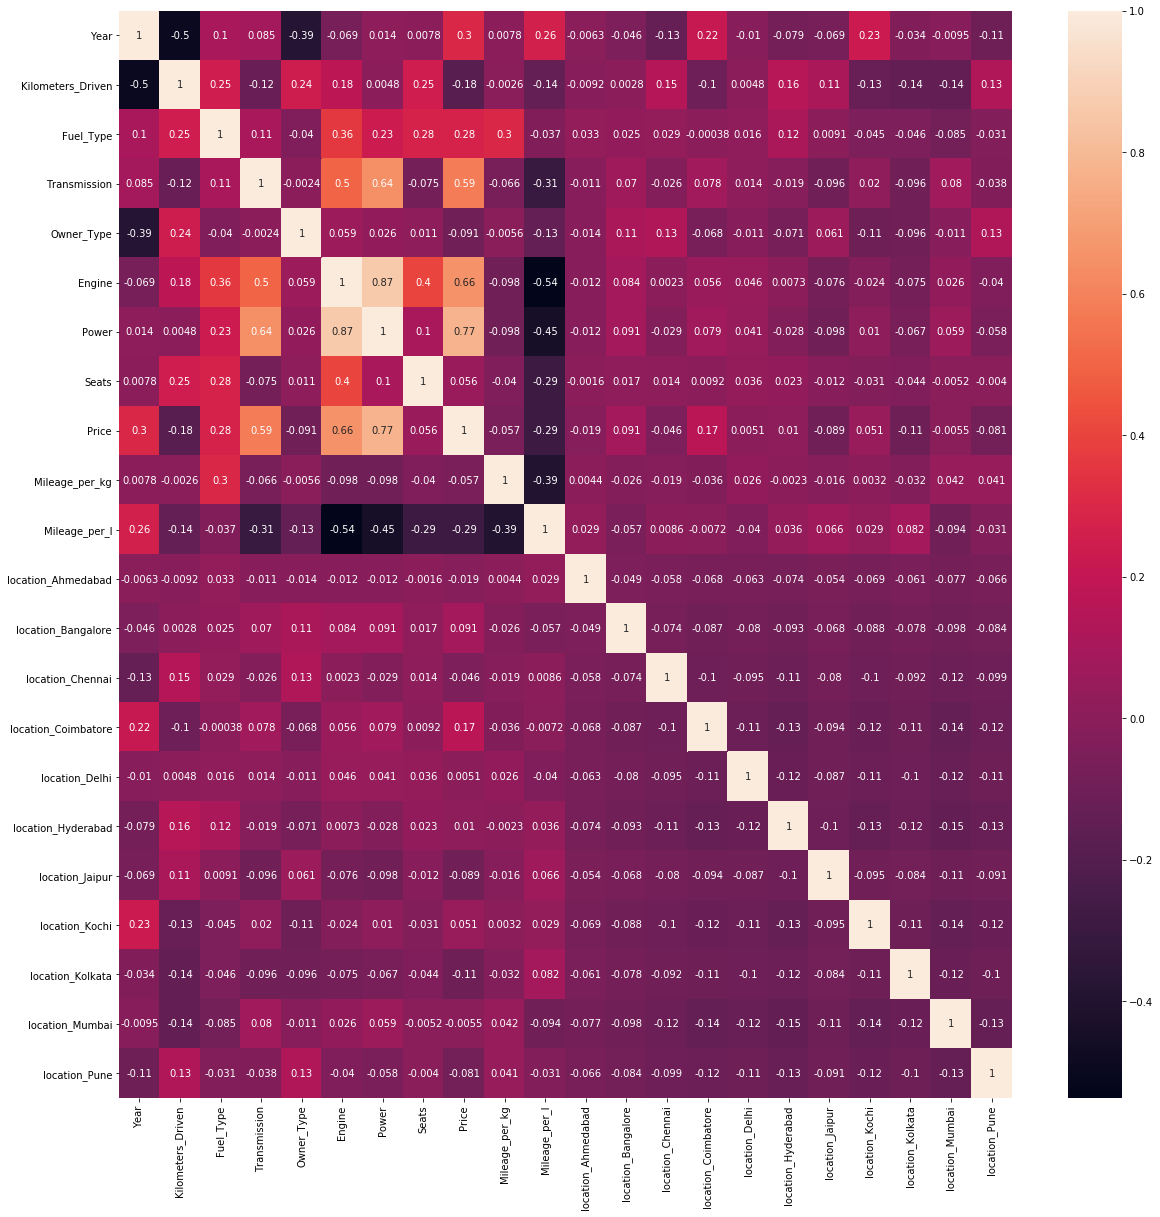

In [184]:
plt.figure(figsize=(20,20))
sb.heatmap(df_int_train.corr(),annot=True)

We have a more extensive heatmap, we use this to weed out features with near zero correlation with the price and reconfirm our observations on multicollinearity. Let us now move onto building the actual model  

In [185]:
import turicreate as tc

We now use a new and powerful ML library called turicreate which has been developed by Apple Inc and supports a variety of Machine Learning applications.

The following is the official github repository of the library : https://github.com/apple/turicreate ; there are installation instructions on this page. 
It supports 64 bit and runs on MacOS, Linux or Windows running Windows Subsystem for Linux.

Here's how to install it on a 64-bit Windows 10 machine --> https://medium.com/@pam.thumbela/installing-turicreate-on-windows-10-534e147a4792. 

https://github.com/apple/turicreate/blob/master/LINUX_INSTALL.md --> contains detailed instructions for installing it on various Linux distributions. 

For MacOS writing the following two commands on Terminal worked in installing turicreate :

python -m pip install turicreate

python -m jupyter notebook

In [186]:
sf_train=tc.SFrame(data=df_int_train)
sf_test=tc.SFrame(data=df_int_test)
train,cv = sf_train.random_split(0.8,seed=5)

We convert the dataframes into SFrames which is turicreate version of a dataframe. Also we do a train and validation split to be able to measure the peroformance of our model

In [187]:
np.array(train.column_names())

array(['Name', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Engine', 'Power', 'Seats', 'Price',
       'Mileage_per_kg', 'Mileage_per_l', 'location_Ahmedabad',
       'location_Bangalore', 'location_Chennai', 'location_Coimbatore',
       'location_Delhi', 'location_Hyderabad', 'location_Jaipur',
       'location_Kochi', 'location_Kolkata', 'location_Mumbai',
       'location_Pune'], dtype='<U19')

We list our features, after removing transmission and energy due to multicollinearity and location encodings of Delhi, Mumbai, Coimbatore and Hyderbabad.  We then implement our model with Lasso (or L-1) regularisation which is an intrinsic feature selection task and penalises unimportant feature weights to reduce to zero depending on the L-1 penalty value chosen.  Let's first start with a random L-1 penalty (100).

In [188]:
train_features=['Name','Year', 'Kilometers_Driven', 'Fuel_Type','Owner_Type','Power','Seats','Mileage_per_kg', 'Mileage_per_l', 'location_Ahmedabad',
       'location_Bangalore', 'location_Chennai','location_Jaipur',
       'location_Kochi', 'location_Kolkata','location_Pune']


example_model=tc.linear_regression.create(train, target='Price', features= train_features, validation_set=None,l2_penalty=0.,l1_penalty=1e2,max_iterations=400)
print("The number of non zero features is " +str(example_model.coefficients['value'].nnz()))


Linear regression:

--------------------------------------------------------

Number of examples          : 4691

Number of features          : 16

Number of unpacked features : 16

Number of coefficients    : 1655

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 1.000000  | 0.078858     | 160.000000         | 15.101695                       |

| 1         | 2        | 0.000012  | 0.704553     | 133.419434         | 10.031128                       |

| 2         | 3        | 0.000012  | 0.745574     | 118.019257         | 8.851911                        |

| 3         | 4        | 0.000012  | 0.788214     | 100.785749         | 7.571254                        |

| 4         | 5        | 0.000012  | 0.823658     | 82.735279          | 6.295149                        |

| 5         | 6        | 0.000012  | 0.863210     | 64.896316          | 5.120601                        |

| 10        | 11       | 0.000012  | 1.045646     | 30.997352          | 2.603521                        |

| 25        | 26       | 0.000012  | 1.626059     | 30.768200          | 2.515140                        |

| 50        | 51       | 0.000012  | 2.524185     | 30.159152          | 2.488456                        |

| 75        | 76       | 0.000012  | 3.421447     | 30.334758          | 2.489933                        |

| 100       | 101      | 0.000012  | 4.314939     | 30.284280          | 2.491591                        |

| 125       | 126      | 0.000012  | 5.195008     | 30.283271          | 2.492855                        |

| 150       | 151      | 0.000012  | 6.075875     | 30.323532          | 2.492630                        |

| 175       | 176      | 0.000012  | 6.953979     | 30.326077          | 2.493003                        |

| 200       | 201      | 0.000012  | 7.827981     | 30.374196          | 2.492756                        |

| 225       | 226      | 0.000012  | 8.710647     | 30.422595          | 2.493516                        |

| 250       | 251      | 0.000012  | 9.603053     | 30.340232          | 2.494067                        |

| 272       | 273      | 0.000012  | 10.367657    | 30.370814          | 2.493681                        |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

The number of non zero features is 1369


In [189]:
s={}

coeff=example_model.coefficients
rows=coeff.num_rows()
for i in range(rows):
    s[example_model.coefficients['name'][i]]=example_model.coefficients['value'][i]
print(s)
print(example_model.evaluate(cv))
print(cv['Price'].head())
example_model.predict(cv).head()

{'(intercept)': -3.8236402558649116, 'Name': -2.0221601213214813, 'Year': 0.0, 'Kilometers_Driven': -3.6171837178351596e-05, 'Fuel_Type': 1.784299614854075, 'Owner_Type': -1.0770907930334765, 'Power': 0.11651488651977152, 'Seats': 0.0, 'Mileage_per_kg': -0.06040152856195931, 'Mileage_per_l': -0.0007011789845019635, 'location_Ahmedabad': -0.9398524508878514, 'location_Bangalore': 1.1444866309355133, 'location_Chennai': -0.08662379036624135, 'location_Jaipur': 0.0, 'location_Kochi': 0.32770523369800003, 'location_Kolkata': -2.0006095388582152, 'location_Pune': -0.2684539462471455}
{'max_error': 40.49568724264738, 'rmse': 3.8751191684391304}
[3.5, 27.0, 5.99, 8.25, 2.85, 4.25, 9.9, 1.85, 5.58, 3.85]


dtype: float
Rows: 10
[3.084267906087331, 31.114530933064078, 8.264673087919768, 8.275114683611708, 3.788364413350183, 4.277902361135754, 8.32823073518784, 0.22183529946384262, 6.824786502393958, 4.352940905261998]

Here we see and compare some of the data from the validation set. But we will have a method to check it over a range of L-1 values to get the best possible one

In [190]:
ls_rmse=[]
l1_penalty_values = np.logspace(1, 3, num=20)
ls=[]
for l1_penalty in l1_penalty_values:
    model_l1=tc.linear_regression.create(train, target='Price', features=train_features,
                                                validation_set=None, 
                                                l2_penalty=0., l1_penalty=l1_penalty,verbose=False,max_iterations=300)
    ls.append(model_l1.coefficients['value'].nnz())
    ls_rmse.append(model_l1.evaluate(cv)['rmse'])
print(ls)
ls_rmse

[1616, 1610, 1606, 1585, 1579, 1567, 1529, 1504, 1453, 1401, 1336, 1269, 1143, 1053, 929, 805, 663, 535, 431, 353]


[4.082263486539867,
 4.015654621629834,
 3.9634137772568665,
 3.9317591473025963,
 3.9123239948316373,
 3.9010621283303695,
 3.8935926127110654,
 3.8855430497693995,
 3.876358920631723,
 3.874882863771633,
 3.8755021165990513,
 3.8793042125011867,
 3.894701440078861,
 3.907521834846679,
 3.9288481655328957,
 3.961638260947892,
 4.009965432636552,
 4.076653589317701,
 4.173345195711777,
 4.291738921041896]

What we have done here is we are using a range of L-1 penalty values over which we are looping to see the rmse in each case and also seeing the number of non zero coefficients, then finally in the lines below we choose that value of the L-1 penalty which had produced the minimum rmse

In [191]:
for i in range(len(ls)):
    if ls_rmse[i]==min(ls_rmse):
        l1_opt=l1_penalty_values[i]

In [192]:
l1_opt

88.58667904100822

In [193]:
min(ls_rmse)

3.874882863771633

l1_opt is the best L-1 penalty value according to the rmse score on the validation set. Below, we implement our final model using this l1 penalty

In [194]:
model=tc.linear_regression.create(train, target='Price', features= train_features, validation_set=None,l2_penalty=0.,l1_penalty=l1_opt,max_iterations=400)
print("The number of non zero coeffs in the final model is " +str(model.coefficients['value'].nnz()))
print("The rmse on the validation set is" +str(model.evaluate(cv)))

Linear regression:

--------------------------------------------------------

Number of examples          : 4691

Number of features          : 16

Number of unpacked features : 16

Number of coefficients    : 1655

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 1.000000  | 0.019014     | 160.000000         | 15.101695                       |

| 1         | 2        | 0.000012  | 0.387617     | 133.409318         | 10.030770                       |

| 2         | 3        | 0.000012  | 0.424307     | 118.005253         | 8.849439                        |

| 3         | 4        | 0.000012  | 0.464290     | 100.763767         | 7.565715                        |

| 4         | 5        | 0.000012  | 0.498128     | 82.702564          | 6.286436                        |

| 5         | 6        | 0.000012  | 0.534706     | 64.852103          | 5.109211                        |

| 10        | 11       | 0.000012  | 0.709766     | 30.954411          | 2.600532                        |

| 50        | 51       | 0.000012  | 2.100213     | 30.119224          | 2.482154                        |

| 100       | 101      | 0.000012  | 3.838488     | 30.256058          | 2.484428                        |

| 150       | 151      | 0.000012  | 5.575024     | 30.287896          | 2.485705                        |

| 200       | 201      | 0.000012  | 7.308600     | 30.311644          | 2.486052                        |

| 250       | 251      | 0.000012  | 9.036687     | 30.353783          | 2.486879                        |

| 290       | 291      | 0.000012  | 10.397234    | 30.343369          | 2.486824                        |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

The number of non zero coeffs in the final model is 1401
The rmse on the validation set is{'max_error': 40.59346580432232, 'rmse': 3.874882863771633}


In [195]:
Predicted_price = np.abs(model.predict(sf_test))

Using this we finally predict our prices on the test set.

In [196]:
sf_test

Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats
Maruti Alto K10 LXI CNG,2014,40929,3.0,1.0,1.0,998.0,58.2,4.0
Maruti Alto 800 2016-2019LXI ...,2013,54493,1.0,1.0,2.0,796.0,47.3,5.0
Toyota Innova CrystaTouring Sport 2.4 MT ...,2017,34000,2.0,1.0,1.0,2393.0,147.8,7.0
Hyundai i20 Magna,2014,29000,1.0,1.0,1.0,1197.0,82.85,5.0
Mahindra XUV500 W8 2WD,2016,85609,2.0,1.0,2.0,2179.0,140.0,7.0
Toyota Fortuner 4x2 ATTRD Sportivo ...,2015,59000,2.0,2.0,1.0,2982.0,168.7,7.0
Hyundai EON Era Plus,2013,65000,1.0,1.0,1.0,814.0,55.2,5.0
Honda City 1.5 S MT,2011,66000,1.0,1.0,2.0,1497.0,118.0,5.0
Mahindra XUV500 W6 2WD,2015,54684,2.0,1.0,1.0,2179.0,140.0,7.0
Audi Q5 2008-2012 2.0 TDI,2012,78000,2.0,2.0,2.0,1968.0,167.6,5.0


In [197]:
result = sf_test.add_column(Predicted_price, 'Price')

The 'result' SFrame is the entire test set with an added column of prices whereas the 'result_concise' SFrame just shows the name of the car with its predicted price for easy reading

In [198]:
result_concise =  result.select_columns(['Name','Price'])

In [199]:
result_concise.print_rows(num_rows = 1201)

+--------------------------------+---------------------+
|              Name              |        Price        |
+--------------------------------+---------------------+
|    Maruti Alto K10 LXI CNG     |  4.455676466740601  |
| Maruti Alto 800 2016-2019 LXI  |  1.241850140584578  |
| Toyota Innova Crysta Touri...  |  14.62734774829859  |
|       Hyundai i20 Magna        |  5.4737077023704215 |
|     Mahindra XUV500 W8 2WD     |  7.423645879189345  |
| Toyota Fortuner 4x2 AT TRD...  |  15.900137281977521 |
|      Hyundai EON Era Plus      |  2.277340548717044  |
|      Honda City 1.5 S MT       |  3.737108398471765  |
|     Mahindra XUV500 W6 2WD     |  10.239494279227621 |
|   Audi Q5 2008-2012 2.0 TDI    |   21.4901020304732  |
|    Hyundai Grand i10 Magna     |  4.862732620388239  |
|       Toyota Corolla H5        |  1.1770432483810431 |
|     Maruti Swift Vdi BSIII     |  4.226144395815278  |
|       Nissan Terrano XL        |   5.73314661236082  |
|        BMW X1 sDrive20d      

In [200]:
result.head()

Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats
Maruti Alto K10 LXI CNG,2014,40929,3.0,1.0,1.0,998.0,58.2,4.0
Maruti Alto 800 2016-2019LXI ...,2013,54493,1.0,1.0,2.0,796.0,47.3,5.0
Toyota Innova CrystaTouring Sport 2.4 MT ...,2017,34000,2.0,1.0,1.0,2393.0,147.8,7.0
Hyundai i20 Magna,2014,29000,1.0,1.0,1.0,1197.0,82.85,5.0
Mahindra XUV500 W8 2WD,2016,85609,2.0,1.0,2.0,2179.0,140.0,7.0
Toyota Fortuner 4x2 ATTRD Sportivo ...,2015,59000,2.0,2.0,1.0,2982.0,168.7,7.0
Hyundai EON Era Plus,2013,65000,1.0,1.0,1.0,814.0,55.2,5.0
Honda City 1.5 S MT,2011,66000,1.0,1.0,2.0,1497.0,118.0,5.0
Mahindra XUV500 W6 2WD,2015,54684,2.0,1.0,1.0,2179.0,140.0,7.0
Audi Q5 2008-2012 2.0 TDI,2012,78000,2.0,2.0,2.0,1968.0,167.6,5.0


In [201]:
result.tail()

Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats
Renault Duster 85PSDiesel RxL ...,2015,70000,2.0,1.0,1.0,1461.0,83.8,5.0
Chevrolet Aveo 1.4 LS,2009,45463,1.0,1.0,1.0,1399.0,92.7,5.0
Honda Amaze S i-Vtech,2015,44776,1.0,1.0,1.0,1198.0,86.7,5.0
Hyundai Grand i10 AT Asta,2016,18242,1.0,2.0,1.0,1197.0,82.0,5.0
Hyundai EON D Lite Plus,2015,21190,1.0,1.0,1.0,814.0,55.2,5.0
Volkswagen Vento DieselTrendline ...,2011,89411,2.0,1.0,1.0,1598.0,103.6,5.0
Volkswagen Polo GT TSI,2015,59000,1.0,2.0,1.0,1197.0,103.6,5.0
Nissan Micra Diesel XV,2012,28000,2.0,1.0,1.0,1461.0,63.1,5.0
Volkswagen Polo GT TSI,2013,52262,1.0,2.0,3.0,1197.0,103.6,5.0
Mercedes-Benz E-Class2009-2013 E 220 CDI ...,2014,72443,2.0,2.0,1.0,2148.0,170.0,5.0


In [202]:
df_result=result.to_dataframe()

In [203]:
df_result

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Mileage_per_kg,...,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,Price
0,Maruti Alto K10 LXI CNG,2014,40929,3.0,1.0,1.0,998.0,58.20,4.0,32.26,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.455676
1,Maruti Alto 800 2016-2019 LXI,2013,54493,1.0,1.0,2.0,796.0,47.30,5.0,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.241850
2,Toyota Innova Crysta Touring Sport 2.4 MT,2017,34000,2.0,1.0,1.0,2393.0,147.80,7.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.627348
3,Hyundai i20 Magna,2014,29000,1.0,1.0,1.0,1197.0,82.85,5.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.473708
4,Mahindra XUV500 W8 2WD,2016,85609,2.0,1.0,2.0,2179.0,140.00,7.0,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.423646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,Volkswagen Vento Diesel Trendline,2011,89411,2.0,1.0,1.0,1598.0,103.60,5.0,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.410643
1197,Volkswagen Polo GT TSI,2015,59000,1.0,2.0,1.0,1197.0,103.60,5.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.440111
1198,Nissan Micra Diesel XV,2012,28000,2.0,1.0,1.0,1461.0,63.10,5.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.252631
1199,Volkswagen Polo GT TSI,2013,52262,1.0,2.0,3.0,1197.0,103.60,5.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.278110


In [204]:
df_result.to_csv('test_result.csv')

We export both SFrames first to pandas dataframes and then to csv files which are also attached in the mail

In [205]:
result_concise.to_dataframe().to_csv('test_concise.csv')

To wrap things up, we show the R2 scores of a) only the validation set and b) the entire sf_train SFrame which is the original training set and contains the set we used for training plus the validation set

In [206]:
true=cv['Price'].to_numpy()
preds=model.predict(cv).to_numpy()

In [207]:
import sklearn.metrics as skm
print("R2 score for validation set : " +str(skm.r2_score(true,np.abs(preds))))

R2 score for validation set : 0.8453466484275692


In [208]:
true_train=sf_train['Price'].to_numpy()
preds_train=model.predict(sf_train).to_numpy()
print("R2 score for original training (train+validation) set : " +str(skm.r2_score(true_train,np.abs(preds_train))))

R2 score for original training (train+validation) set : 0.9372035265911706
